In [171]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import random

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## 2-1. AdaLine

**a. Generate and plot data**

In [172]:
np.random.seed(10)

In [173]:
mean1_x = 1
sd1_x = 0.3
class1_x = np.random.normal(mean1_x, sd1_x, 100)

mean1_y = 1
sd1_y = 0.3
class1_y = np.random.normal(mean1_y, sd1_y, 100)


In [174]:
class1_data = list(zip(class1_x,class1_y))
class1_label = np.zeros(100) - np.ones(100)
class1 = list(zip(class1_data,class1_label))


In [175]:
mean2_x = -1
sd2_x = 0.3
class2_x = np.random.normal(mean2_x, sd2_x, 100)

mean2_y = -1
sd2_y = 0.3
class2_y = np.random.normal(mean2_y, sd2_y, 100)

In [176]:
class2_data = list(zip(class2_x,class2_y))
class2_label = np.ones(100)
class2 = list(zip(class2_data,class2_label))

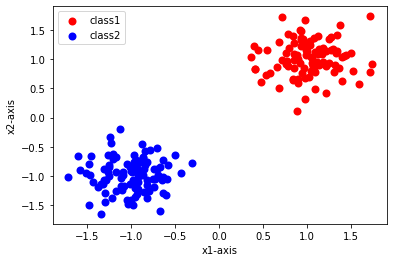

In [177]:
plt.scatter(class1_x, class1_y, c ="red",
            linewidths = 2)
 
plt.scatter(class2_x, class2_y, c ="blue",
            linewidths = 2)
 
    
plt.xlabel("x1-axis")
plt.ylabel("x2-axis")
plt.legend(["class1" , "class2"])
plt.savefig("Q2.1_fig1.png")
plt.show()

## b.


**Implement Adaline model**

In [178]:
def find_separation_line(start,end,w,b):
    x= np.linspace(start,end)
    y = -(w[0][0] * x + b)
    y = y / w[0][1]
    return x,y

In [179]:
def preprocess_data(class1,class2):
    random.seed(10)
    classes = class1 + class2
    random.shuffle(classes)
    df = pd.DataFrame (classes, columns = ['position','label'])
    x = df['position']
    y = df['label']
    return x,y

In [180]:
#step 0 
#Initialize the weights, the bias term (small random values) and choose a small value for learning rate.
def initialize(k):
    np.random.seed(100)
    w = np.random.rand(1,2) * k
    b = np.zeros(1)
    print('w:',w)
    return w,b

In [181]:
def sign_activation(net):
    if net >= 0:
        return 1
    else:
        return -1

In [182]:
def tanh_activation(net):
    return np.tanh(net)

In [183]:
#Step3
'''Compute sum of weighted inputs “net” according
    to net = w.x + b'''
def forward(w,x,b,act_func):
    net = np.dot(w,x) + b
    if act_func == 'sign':
        h = sign_activation(net)
    elif act_func == 'tanh':
        h = tanh_activation(net)
    return h, net

In [184]:
#Step4 - sign
'''Update the weights and the bias term'''
def update_delta(w,b,x,t,net,alpha):
    t = t.reshape(1,)
    x = x.reshape((1,2))

    delta_w = alpha * np.dot((t - net), x)
    delta_b = alpha * (t - net)
  
    w = w + delta_w
    b = b + delta_b
    
    return w,b

In [185]:
#Step4 - tanh
def updata_tanh(w,b,x,t,h,alpha,gamma):
    t = t.reshape(1,)
    x = x.reshape((1,2))

    diff_w = alpha * (1-h**2) * gamma * np.dot((t - h), x)
    diff_b = alpha * (1-h**2) * gamma * (t - h)
  
    w = w + diff_w
    b = b + diff_b
    
    return w,b

In [186]:
#Step 5 - sign
'''Computed cost function'''
def calculate_cost_sign(t,net):
    e = 0.5 * np.power((t-net),2)
    return e
    

In [187]:
#Step 5 - tanh
'''Computed cost function'''
def calculate_cost_tanh(t,gamma,net):
    e = 0.5 * np.power( t - gamma * np.tanh(net),2) 
    return e

In [188]:
'''Train model'''
def Adaline(x,y,max_iter,learning_rate, act_func,samples):
    cost_list = []
    eps = 0.00005
    k = 0.05 #Multiple to reduce weights
    gamma = 0.005  #for tanh activation function hyperparamter
    w,b = initialize(k) #Step 0 
    for i in range(max_iter): #Step 1
        h, net = forward(w,np.asarray(x[i%samples]),b,act_func) #Step 3
        if act_func == 'sign':
            cost = calculate_cost_sign(np.asarray(y[i%samples]),net)
        elif act_func == 'tanh':
            cost = calculate_cost_tanh(np.asarray(y[i%samples]),net,gamma)
        #after a epoch
        if i % samples == 0 and i!=0:   #Step5
            cost_list.append(cost)
            print('Epoch %d / %d' % (len(cost_list), int(max_iter/samples)))
            if cost <= eps:  
                return w,b, cost_list
        if act_func == 'sign':
            w,b = update_delta(w,b,np.asarray(x[i%samples]),np.asarray(y[i%samples]),net, learning_rate)
        elif act_func == 'tanh':
            w,b
        w,b = updata_tanh(w,b,np.asarray(x[i%samples]),np.asarray(y[i%samples]),h,learning_rate, gamma) #Step 4
    return w,b, cost_list  #Step 6

In [189]:
x, y = preprocess_data(class1,class2) #Suffle and make an Appropriate inputs

**Use model for data**


**Adaline with sign activation function - Part B**

In [190]:
w,b, error_lst = Adaline(x,y,max_iter = 200*10,learning_rate = 0.001, act_func = 'sign',samples = 200)

w: [[0.02717025 0.01391847]]
Epoch 1 / 10
Epoch 2 / 10
Epoch 3 / 10
Epoch 4 / 10
Epoch 5 / 10
Epoch 6 / 10
Epoch 7 / 10
Epoch 8 / 10
Epoch 9 / 10


In [191]:
print('w: ',w,'x + ',b)

w:  [[-0.46854459 -0.47096977]] x +  [0.0104582]


**Plot cost function**

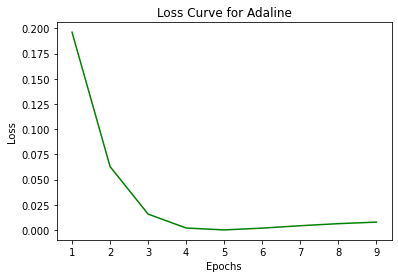

In [192]:
itr = range(1,len(error_lst)+1)
plt.plot(itr, error_lst, 'g', label='Training loss')
plt.title('Loss Curve for Adaline')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig("Q2.2_fig2.png")


**Plot scatter with sepration line**

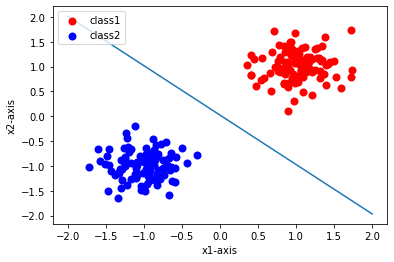

In [193]:
px1,px2 = find_separation_line(-2,2,w,b)

plt.scatter(class1_x, class1_y, c ="red",
            linewidths = 2)
 
plt.scatter(class2_x, class2_y, c ="blue",
            linewidths = 2)
plt.plot(px1,px2)

 
plt.xlabel("x1-axis")
plt.ylabel("x2-axis")
plt.legend(["class1" , "class2"],loc = 'upper left')
plt.savefig("Q2.2_fig3.png")

plt.show()

**Adaline with tanh activation function - part B**

In [194]:
w,b, error_lst = Adaline(x,y,max_iter = 8000,learning_rate = 0.1, act_func = 'tanh', samples = 200)

w: [[0.02717025 0.01391847]]
Epoch 1 / 40
Epoch 2 / 40
Epoch 3 / 40
Epoch 4 / 40
Epoch 5 / 40
Epoch 6 / 40
Epoch 7 / 40
Epoch 8 / 40
Epoch 9 / 40
Epoch 10 / 40
Epoch 11 / 40
Epoch 12 / 40
Epoch 13 / 40
Epoch 14 / 40
Epoch 15 / 40
Epoch 16 / 40
Epoch 17 / 40
Epoch 18 / 40
Epoch 19 / 40
Epoch 20 / 40
Epoch 21 / 40
Epoch 22 / 40
Epoch 23 / 40
Epoch 24 / 40
Epoch 25 / 40
Epoch 26 / 40
Epoch 27 / 40
Epoch 28 / 40
Epoch 29 / 40
Epoch 30 / 40
Epoch 31 / 40
Epoch 32 / 40
Epoch 33 / 40
Epoch 34 / 40
Epoch 35 / 40
Epoch 36 / 40
Epoch 37 / 40
Epoch 38 / 40
Epoch 39 / 40


In [195]:
print('w: ',w,'x + ',b)

w:  [[-0.64966306 -0.64810861]] x +  [0.00740925]


**Plot cost function**

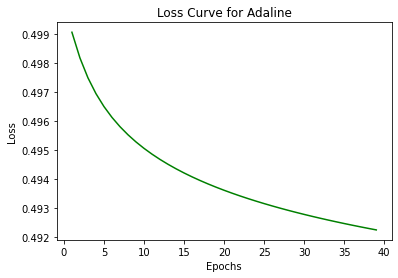

In [196]:
itr = range(1,len(error_lst)+1)
plt.plot(itr, error_lst, 'g', label='Training loss')
plt.title('Loss Curve for Adaline')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig("Q2.2_fig4.png")


**Plot scatter with sepration line**

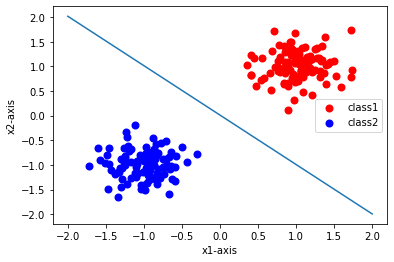

In [197]:
px1,px2 = find_separation_line(-2,2,w,b)

plt.scatter(class1_x, class1_y, c ="red",
            linewidths = 2)
 
plt.scatter(class2_x, class2_y, c ="blue",
            linewidths = 2)
plt.plot(px1,px2)

 
plt.xlabel("x1-axis")
plt.ylabel("x2-axis")
plt.legend(["class1" , "class2"])
plt.savefig("Q2.2_fig5.png")

plt.show()

## C.
**َTry Another data**

**Generate and plot data**

In [198]:
mean1_x = 0
sd1_x = 0.6
class1_x = np.random.normal(mean1_x, sd1_x, 100)

mean1_y = 0
sd1_y = 0.6
class1_y = np.random.normal(mean1_y, sd1_y, 100)

In [199]:
class1_data = list(zip(class1_x,class1_y))
class1_label = np.zeros(100) - np.ones(100) 
class1 = list(zip(class1_data,class1_label))

In [200]:
mean2_x = 2
sd2_x = 0.8
class2_x = np.random.normal(mean2_x, sd2_x, 20)

mean2_y = 2
sd2_y = 0.8
class2_y = np.random.normal(mean2_y, sd2_y, 20)

In [201]:
class2_data = list(zip(class2_x,class2_y))
print(class2_data)
class2_label = np.ones(100)
class2 = list(zip(class2_data,class2_label))

[(2.473618615488302, 2.313150895417536), (1.6503484674787414, 2.261796282381161), (2.081420618375453, 1.7509223515450603), (3.0466774613153182, 0.8602755290562443), (3.110081449126842, 1.5001022517270142), (0.6116870821335412, 1.9120036832633152), (2.2307019361818594, 2.76236754239354), (1.7287316533789092, 1.2133098850856499), (2.4218953062595308, 1.1243542483074433), (1.7005576930018023, 1.8069210003584122), (2.3816738379341476, 1.5239089286746386), (0.8561898702110284, 1.213750484174155), (2.3261652199812066, 2.070583947540388), (1.3373756858035464, 1.5177925041410287), (2.3387658254701202, 2.9004443623860787), (1.8723861079973354, 2.7416426390402027), (2.9928656697572835, 0.18467440425098758), (3.3308290485898464, 1.7214634898134604), (1.4704498280592686, 1.868779677859155), (4.772181718783454, 2.9732644722919277)]


**Plot scatter**

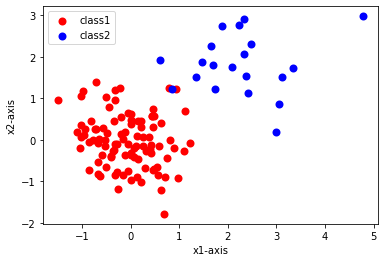

In [202]:
plt.scatter(class1_x, class1_y, c ="red",
            linewidths = 2)
 
plt.scatter(class2_x, class2_y, c ="blue",
            linewidths = 2)


 
plt.xlabel("x1-axis")
plt.ylabel("x2-axis")
plt.legend(["class1" , "class2"])
plt.savefig("Q2.2_fig6.png")

plt.show()

**Adaline with sign activation function - Part C**


In [203]:
x, y = preprocess_data(class1,class2)
w,b, error_lst = Adaline(x,y,max_iter = 4800,learning_rate = 0.001, act_func = 'sign', samples= 120)

w: [[0.02717025 0.01391847]]
Epoch 1 / 40
Epoch 2 / 40
Epoch 3 / 40
Epoch 4 / 40
Epoch 5 / 40
Epoch 6 / 40
Epoch 7 / 40
Epoch 8 / 40
Epoch 9 / 40
Epoch 10 / 40
Epoch 11 / 40
Epoch 12 / 40
Epoch 13 / 40
Epoch 14 / 40
Epoch 15 / 40
Epoch 16 / 40
Epoch 17 / 40
Epoch 18 / 40
Epoch 19 / 40


In [204]:
print('w: ',w,'x + ',b)

w:  [[0.35510575 0.27965794]] x +  [-0.74072816]


**Plot cost function**

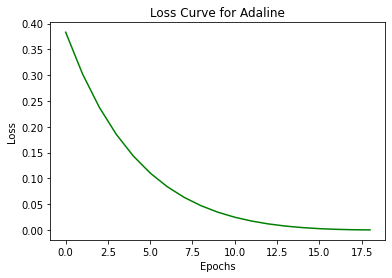

In [205]:
import numpy as np
itr = range(0,len(error_lst))
plt.plot(itr, error_lst, 'g', label='Training loss')
plt.title('Loss Curve for Adaline')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig("Q2.2_fig7.png")


In [206]:
def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k')

**Plot scatter with sepration line**

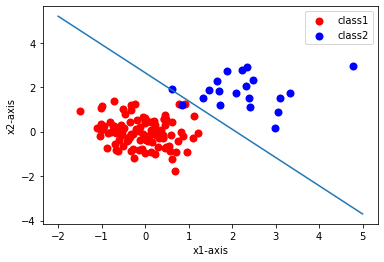

In [207]:
px1,px2 = find_separation_line(-2,5,w,b)

plt.scatter(class1_x, class1_y, c ="red",
            linewidths = 2)
 
plt.scatter(class2_x, class2_y, c ="blue",
            linewidths = 2)
plt.plot(px1,px2)

 
plt.xlabel("x1-axis")
plt.ylabel("x2-axis")
plt.legend(["class1" , "class2"])
plt.savefig("Q2.2_fig8.png")

plt.show()

**Adaline with tanh activation function  - Part C**

In [208]:
w,b, error_lst = Adaline(x,y,max_iter = 8000,learning_rate = 0.1, act_func = 'tanh', samples = 120)

w: [[0.02717025 0.01391847]]
Epoch 1 / 66
Epoch 2 / 66
Epoch 3 / 66
Epoch 4 / 66
Epoch 5 / 66
Epoch 6 / 66
Epoch 7 / 66
Epoch 8 / 66
Epoch 9 / 66
Epoch 10 / 66
Epoch 11 / 66
Epoch 12 / 66
Epoch 13 / 66
Epoch 14 / 66
Epoch 15 / 66
Epoch 16 / 66
Epoch 17 / 66
Epoch 18 / 66
Epoch 19 / 66
Epoch 20 / 66
Epoch 21 / 66
Epoch 22 / 66
Epoch 23 / 66
Epoch 24 / 66
Epoch 25 / 66
Epoch 26 / 66
Epoch 27 / 66
Epoch 28 / 66
Epoch 29 / 66
Epoch 30 / 66
Epoch 31 / 66
Epoch 32 / 66
Epoch 33 / 66
Epoch 34 / 66
Epoch 35 / 66
Epoch 36 / 66
Epoch 37 / 66
Epoch 38 / 66
Epoch 39 / 66
Epoch 40 / 66
Epoch 41 / 66
Epoch 42 / 66
Epoch 43 / 66
Epoch 44 / 66
Epoch 45 / 66
Epoch 46 / 66
Epoch 47 / 66
Epoch 48 / 66
Epoch 49 / 66
Epoch 50 / 66
Epoch 51 / 66
Epoch 52 / 66
Epoch 53 / 66
Epoch 54 / 66
Epoch 55 / 66
Epoch 56 / 66
Epoch 57 / 66
Epoch 58 / 66
Epoch 59 / 66
Epoch 60 / 66
Epoch 61 / 66
Epoch 62 / 66
Epoch 63 / 66
Epoch 64 / 66
Epoch 65 / 66
Epoch 66 / 66


In [209]:
print('w: ',w,'x + ',b)

w:  [[0.45959191 0.36464527]] x +  [-0.91406009]


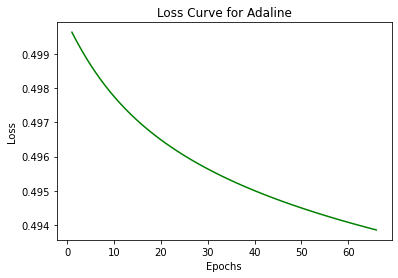

In [210]:
itr = range(1,len(error_lst)+1)
plt.plot(itr, error_lst, 'g', label='Training loss')
plt.title('Loss Curve for Adaline')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig("Q2.2_fig9.png")


**Plot scatter with sepration line**

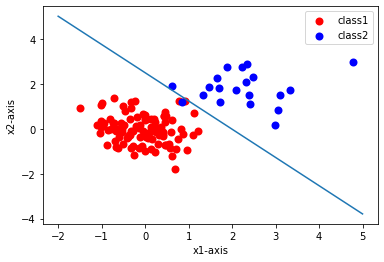

In [211]:
px1,px2 = find_separation_line(-2,5,w,b)

plt.scatter(class1_x, class1_y, c ="red",
            linewidths = 2)
 
plt.scatter(class2_x, class2_y, c ="blue",
            linewidths = 2)
plt.plot(px1,px2)

 
plt.xlabel("x1-axis")
plt.ylabel("x2-axis")
plt.legend(["class1" , "class2"])
plt.savefig("Q2.2_fig10.png")
plt.show()